In [2]:
import numpy as np
import pandas as pd

## Data

In [3]:
data=pd.read_csv("/content/Data for problem 2.csv")
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


CUST_ID: Credit card holder ID

BALANCE: Monthly average balance (based on daily balance averages)

BALANCE_FREQUENCY: Ratio of last 12 months with balance

PURCHASES: Total purchase amount spent during last 12 months

ONEOFF_PURCHASES: Total amount of one-off purchases

INSTALLMENTS_PURCHASES: Total amount of installment purchases

CASH_ADVANCE: Total cash-advance amount

PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)

ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases 

PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency

AVERAGE_PURCHASE_TRX: Average amount per purchase transaction

CASH_ADVANCE_TRX: Average amount per cash-advance transaction

PURCHASES_TRX: Average amount per purchase transaction

CREDIT_LIMIT: Credit limit

PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period

MINIMUM_PAYMENTS: Total minimum payments due in the period.

PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance

TENURE: Number of months as a customer


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Cleaning

In [6]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [9]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Analysis

In [10]:
print(pd.DataFrame(data['TENURE'].value_counts()))

    TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175


###	Monthly average purchase, cash advance amount,	average amount per purchase and cash advance transaction.

In [11]:
data['MONTHLY_AVG_PURCH']=data['PURCHASES']/data['TENURE']
data['MONTHLY_CASH_ADV']=data['CASH_ADVANCE']/data['TENURE']
print(data['MONTHLY_AVG_PURCH'].head(),'\n',
data['MONTHLY_CASH_ADV'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTHLY_AVG_PURCH, dtype: float64 
 0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: MONTHLY_CASH_ADV, dtype: float64


In [12]:
data['CASH_ADVANCE'].sum()

8760896.456566

In [13]:
data['CASH_ADVANCE'].mean()

978.8711124654749

In [14]:
data['MONTHLY_CASH_ADV'].sum()

796352.9539345879

In [15]:
data['MONTHLY_CASH_ADV'].mean()

88.97798367984213

In [16]:
data['PURCHASES'].sum()

8978683.26

In [17]:
data['PURCHASES'].mean()

1003.2048335195564

In [18]:
data['MONTHLY_AVG_PURCH'].mean()

86.1751728841086

In [19]:
data['MONTHLY_AVG_PURCH'].sum()

771267.7973127706

### Purchases by type

In [20]:
data[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [21]:
k={'TYPE_OF_PURCH':[]}
data['TYPE_OF_PURCH'] = pd.DataFrame(k)

In [22]:
data['TYPE_OF_PURCH'].loc[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0)]="none"
data['TYPE_OF_PURCH'].loc[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0)]='both'
data['TYPE_OF_PURCH'].loc[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0)]='one_off'
data['TYPE_OF_PURCH'].loc[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0)]='installment'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [23]:
print(data['TYPE_OF_PURCH'].head(10))

0    installment
1           none
2        one_off
3        one_off
4        one_off
5    installment
6           both
7    installment
8           both
9        one_off
Name: TYPE_OF_PURCH, dtype: object


In [24]:
print(data[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(10))

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0              0.00                   95.40
1              0.00                    0.00
2            773.17                    0.00
3           1499.00                    0.00
4             16.00                    0.00
5              0.00                 1333.28
6           6402.63                  688.38
7              0.00                  436.20
8            661.49                  200.00
9           1281.60                    0.00


In [25]:
data.shape

(8950, 21)

In [26]:
print(pd.DataFrame(data['TYPE_OF_PURCH'].value_counts()))

             TYPE_OF_PURCH
both                  2774
installment           2260
none                  2042
one_off               1874


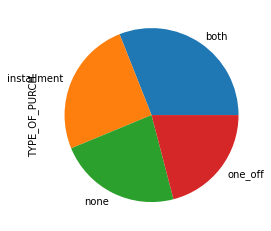

In [27]:
data['TYPE_OF_PURCH'].value_counts().plot.pie()

In [29]:
data['PAYMENTS'].head()

0     201.802084
1    4103.032597
2     622.066742
3       0.000000
4     678.334763
Name: PAYMENTS, dtype: float64

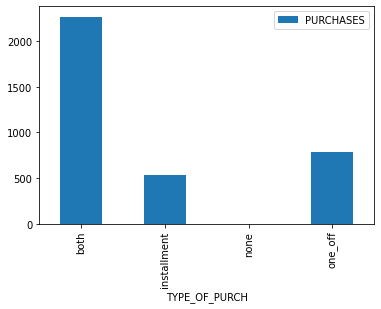

In [30]:
PTP=data[['TYPE_OF_PURCH','PURCHASES']].groupby(['TYPE_OF_PURCH']).mean()
PTP.plot.bar()

In [31]:
data['PURCHASES'].sum()

8978683.26

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88c4003748>],
      dtype=object)

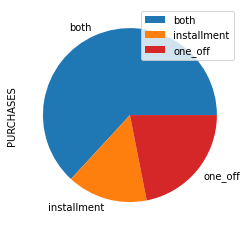

In [32]:
PTP.plot.pie(subplots=True)

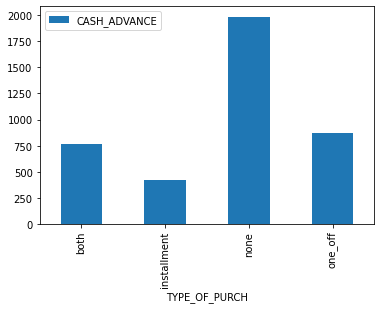

In [33]:
PTCA=data[['TYPE_OF_PURCH','CASH_ADVANCE']].groupby(['TYPE_OF_PURCH']).mean()
PTCA.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88c456f048>],
      dtype=object)

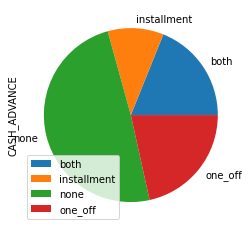

In [34]:
PTCA.plot.pie(subplots=True)

###	Limit usage (balance to credit limit ratio),

In [35]:
data['LIMIT_USAGE']=data['BALANCE']/data['CREDIT_LIMIT']
data['LIMIT_USAGE'].mean()

0.38888363881802096

### Payments to minimum payments ratio 

In [36]:
data['PAY_TO_MIN_PAY']=data['PAYMENTS']/data['MINIMUM_PAYMENTS']
data['PAY_TO_MIN_PAY'].mean()

9.059164107684873

### Cash advance by tenure of customers

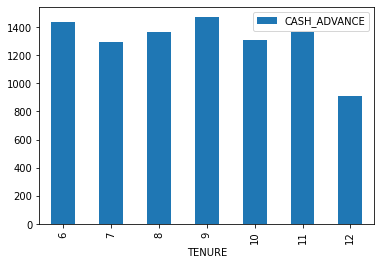

In [37]:
data[['CASH_ADVANCE','TENURE']].groupby(['TENURE']).mean().plot.bar()

### Correlation

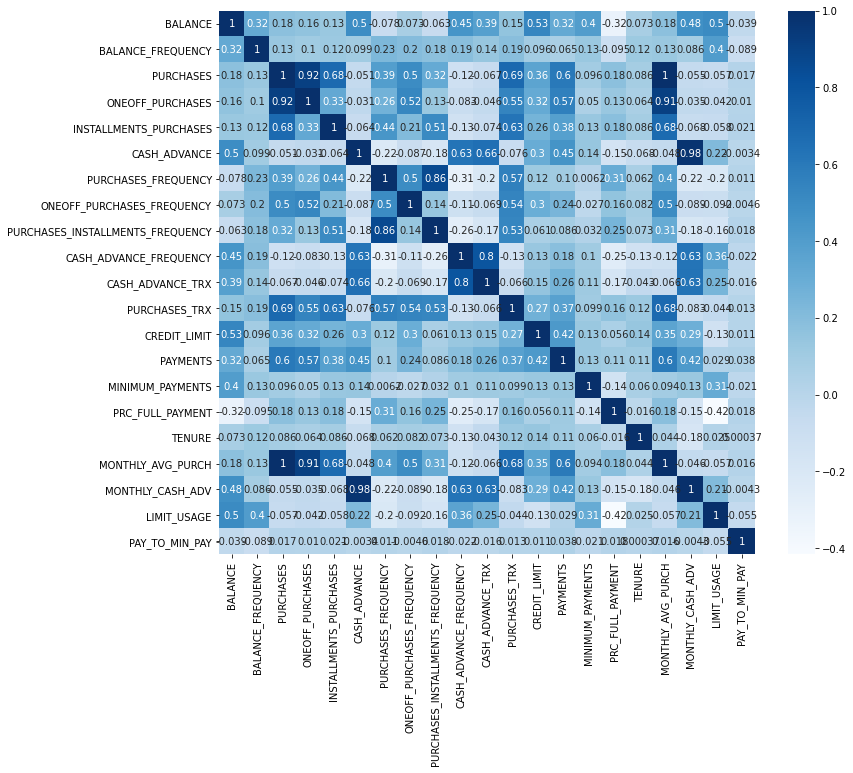

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

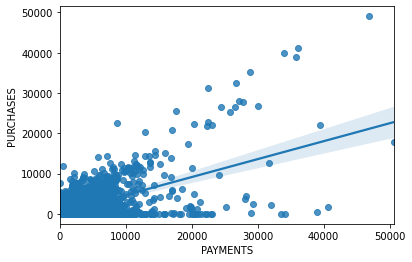

In [39]:
import seaborn as sns
sns.regplot(x='PAYMENTS',y='PURCHASES',data=data)

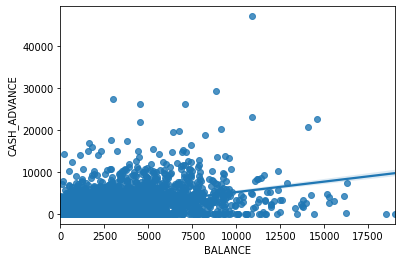

In [40]:
sns.regplot(x='BALANCE',y='CASH_ADVANCE',data=data)

### Applying PCA as data reduction technique for variable reduction and KMeans for clustering algorithm to reveal the behavioral segments of credit card holders

In [41]:
datanw=data.drop(['CUST_ID','TYPE_OF_PURCH'],axis=1)
datanw.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
MONTHLY_AVG_PURCH                   float64
MONTHLY_CASH_ADV                    float64
LIMIT_USAGE                         float64
PAY_TO_MIN_PAY                      float64
dtype: object

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(datanw)
data_sc.shape

(8950, 21)

In [43]:
from sklearn.decomposition import PCA
pc=PCA(n_components=5)
data_pc=pc.fit_transform(data_sc)
data_s=pd.DataFrame(data_pc,columns=['PVC0','PVC1','PVC2','PVC3','PVC4'])
data_s.head()

,PVC0,PVC1,PVC2,PVC3,PVC4
0,-1.575217,-1.447764,-0.332268,0.773628,0.165821
1,-1.415182,3.136560,-1.263734,-0.301376,1.007231
2,0.850090,-0.566167,0.678913,0.624004,-0.071323
3,-0.615830,-0.355311,-0.864667,1.699015,0.694545
4,-1.627360,-0.723604,0.755319,1.282738,-0.247159


In [44]:
from sklearn.cluster import KMeans

n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(data_s)
    cost.append(kmean.inertia_) 

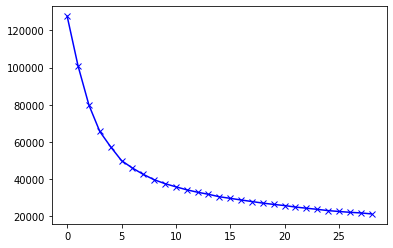

In [45]:
plt.plot(cost, 'bx-')

In [46]:
kmean= KMeans(5)
kmean.fit(data_s)
labels=kmean.labels_

In [47]:
data_sc_clu=pd.concat([data_s, pd.DataFrame({'cluster':labels})], axis=1)
data_sc_clu.head(10)

,PVC0,PVC1,PVC2,PVC3,PVC4,cluster
0,-1.575217,-1.447764,-0.332268,0.773628,0.165821,1
1,-1.415182,3.136560,-1.263734,-0.301376,1.007231,2
2,0.850090,-0.566167,0.678913,0.624004,-0.071323,0
3,-0.615830,-0.355311,-0.864667,1.699015,0.694545,1
4,-1.627360,-0.723604,0.755319,1.282738,-0.247159,1
5,0.208963,-0.455414,2.072044,0.218574,0.163909,0
6,7.066654,-0.670304,-1.872441,0.353469,-0.259864,3
7,0.068132,-1.027918,1.998290,-0.946502,0.051786,0
8,-0.355315,-0.796775,0.082195,0.687829,0.585064,1
9,-0.307620,-0.859644,-1.586873,1.544871,1.261510,1


In [48]:
all_clu=list(set(labels))
all_clu

[0, 1, 2, 3, 4]

## Clusturing the detail profile and then finding the characteristics of those clusters

In [50]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCH,MONTHLY_CASH_ADV,TYPE_OF_PURCH,LIMIT_USAGE,PAY_TO_MIN_PAY
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075


In [51]:
col=['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'LIMIT_USAGE', 'PAY_TO_MIN_PAY']

In [52]:
df=data[col]
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,LIMIT_USAGE,PAY_TO_MIN_PAY
0,40.900749,95.40,0.00,95.4,0.000000,0,2,1000.0,201.802084,0.040901,1.446508
1,3202.467416,0.00,0.00,0.0,6442.945483,4,0,7000.0,4103.032597,0.457495,3.826241
2,2495.148862,773.17,773.17,0.0,0.000000,0,12,7500.0,622.066742,0.332687,0.991682
3,1666.670542,1499.00,1499.00,0.0,205.788017,1,1,7500.0,0.000000,0.222223,0.000000
4,817.714335,16.00,16.00,0.0,0.000000,0,1,1200.0,678.334763,0.681429,2.771075


In [53]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df)
    cost.append(kmean.inertia_) 

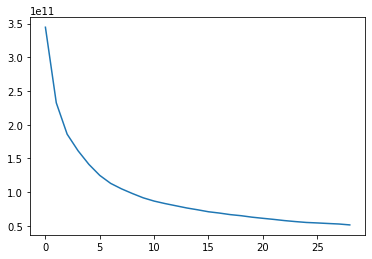

In [54]:
plt.plot(cost)

In [55]:
kmean= KMeans(5)
kmean.fit(df)
lab=kmean.labels_

In [56]:
df_clu=pd.concat([df, pd.DataFrame({'cluster':lab})], axis=1)
df_clu.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,LIMIT_USAGE,PAY_TO_MIN_PAY,cluster
0,40.900749,95.40,0.00,95.4,0.000000,0,2,1000.0,201.802084,0.040901,1.446508,0
1,3202.467416,0.00,0.00,0.0,6442.945483,4,0,7000.0,4103.032597,0.457495,3.826241,2
2,2495.148862,773.17,773.17,0.0,0.000000,0,12,7500.0,622.066742,0.332687,0.991682,2
3,1666.670542,1499.00,1499.00,0.0,205.788017,1,1,7500.0,0.000000,0.222223,0.000000,2
4,817.714335,16.00,16.00,0.0,0.000000,0,1,1200.0,678.334763,0.681429,2.771075,0


In [57]:
df_clu['cluster'].value_counts()

0    5309
2    2503
1     817
3     297
4      24
Name: cluster, dtype: int64

In [58]:
clus0=pd.DataFrame(df_clu[df_clu['cluster']==0].reset_index())
clus1=pd.DataFrame(df_clu[df_clu['cluster']==1].reset_index())
clus2=pd.DataFrame(df_clu[df_clu['cluster']==2].reset_index())
clus3=pd.DataFrame(df_clu[df_clu['cluster']==3].reset_index())
clus4=pd.DataFrame(df_clu[df_clu['cluster']==4].reset_index())

In [59]:
clus0['BALANCE']

0         40.900749
1        817.714335
2       1809.828751
3       1823.652743
4       1293.124939
           ...     
5304      28.493517
5305      19.183215
5306      23.398673
5307      13.457564
5308     372.708075
Name: BALANCE, Length: 5309, dtype: float64

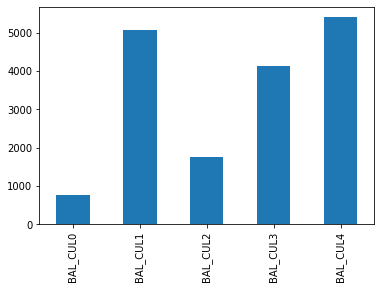

In [60]:
col={'BAL_CUL0':clus0['BALANCE'],'BAL_CUL1':clus1['BALANCE'],'BAL_CUL2':clus2['BALANCE'],'BAL_CUL3':clus3['BALANCE'],'BAL_CUL4':clus4['BALANCE']}
balance=pd.concat(col,axis=1).mean()
balance.plot.bar()

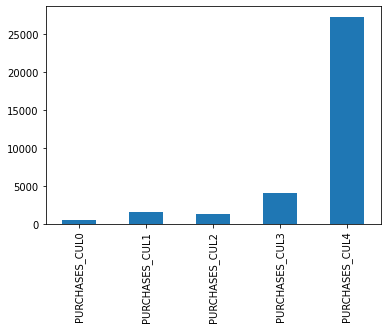

In [61]:
col={'PURCHASES_CUL0':clus0['PURCHASES'],'PURCHASES_CUL1':clus1['PURCHASES'],'PURCHASES_CUL2':clus2['PURCHASES'],'PURCHASES_CUL3':clus3['PURCHASES'],'PURCHASES_CUL4':clus4['PURCHASES']}
purch=pd.concat(col,axis=1).mean()
purch.plot.bar()

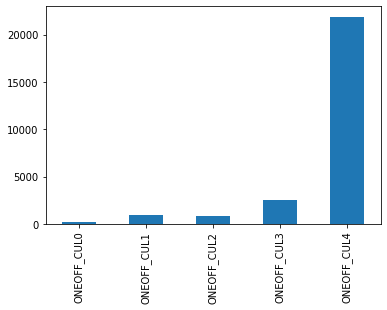

In [62]:
col={'ONEOFF_CUL0':clus0['ONEOFF_PURCHASES'],'ONEOFF_CUL1':clus1['ONEOFF_PURCHASES'],'ONEOFF_CUL2':clus2['ONEOFF_PURCHASES'],'ONEOFF_CUL3':clus3['ONEOFF_PURCHASES'],'ONEOFF_CUL4':clus4['ONEOFF_PURCHASES']}
ONEOFF=pd.concat(col,axis=1).mean()
ONEOFF.plot.bar()

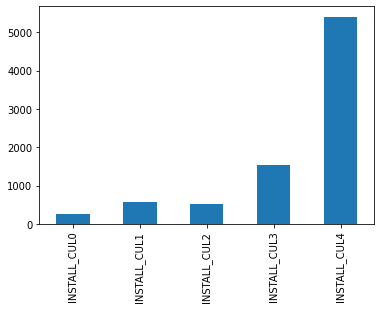

In [63]:
col={'INSTALL_CUL0':clus0['INSTALLMENTS_PURCHASES'],'INSTALL_CUL1':clus1['INSTALLMENTS_PURCHASES'],'INSTALL_CUL2':clus2['INSTALLMENTS_PURCHASES'],'INSTALL_CUL3':clus3['INSTALLMENTS_PURCHASES'],'INSTALL_CUL4':clus4['INSTALLMENTS_PURCHASES']}
installm=pd.concat(col,axis=1).mean()
installm.plot.bar()

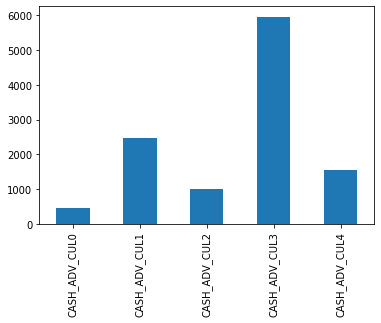

In [64]:
col={'CASH_ADV_CUL0':clus0['CASH_ADVANCE'],'CASH_ADV_CUL1':clus1['CASH_ADVANCE'],'CASH_ADV_CUL2':clus2['CASH_ADVANCE'],'CASH_ADV_CUL3':clus3['CASH_ADVANCE'],'CASH_ADV_CUL4':clus4['CASH_ADVANCE']}
purch=pd.concat(col,axis=1).mean()
purch.plot.bar()

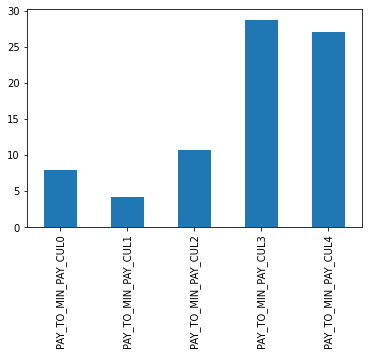

In [65]:
col={'PAY_TO_MIN_PAY_CUL0':clus0['PAY_TO_MIN_PAY'],'PAY_TO_MIN_PAY_CUL1':clus1['PAY_TO_MIN_PAY'],'PAY_TO_MIN_PAY_CUL2':clus2['PAY_TO_MIN_PAY'],'PAY_TO_MIN_PAY_CUL3':clus3['PAY_TO_MIN_PAY'],'PAY_TO_MIN_PAY_CUL4':clus4['PAY_TO_MIN_PAY']}
purch=pd.concat(col,axis=1).mean()
purch.plot.bar()

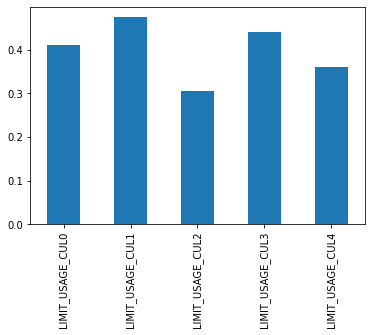

In [66]:
col={'LIMIT_USAGE_CUL0':clus0['LIMIT_USAGE'],'LIMIT_USAGE_CUL1':clus1['LIMIT_USAGE'],'LIMIT_USAGE_CUL2':clus2['LIMIT_USAGE'],'LIMIT_USAGE_CUL3':clus3['LIMIT_USAGE'],'LIMIT_USAGE_CUL4':clus4['LIMIT_USAGE']}
lmt=pd.concat(col,axis=1).mean()
lmt.plot.bar()

# Strategies for the clusters:

### **Cluster 4:** These customers have high amount of balance, they do a lot of purchases, but they do not take advance cash so for they we have to provide some exciting prizes if they take advance cash. Also their cash limit should be increased to make purchase and taking advance cash.


### **Cluster 3:** These type of customer are taking lots of advance cash, also they are paying it back well, also they have nice amount of balance in their account, but they are doing less number of purchases using card so they should be given some special card or voucher to make purchases


### **Cluster 0:** They have comparatively less balance in their account and they don’t prefer to do much purchases or taking advance cash. They should be given some extra discount on purchase and advance cash at lower interest to attract them more for using credit card.


### **Cluster 1:** They have similar characteristic like cluster 0 so they same strategies can be applied in this cluster also.


### **Cluster 2:** They have good balance in their account but they are not making any purchase or taking any cash advance. They should be encourage more to do purchases by giving discount coupons etc.

